In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import viz_kmeans
import wrangle
from pydataset import data

np.set_printoptions(suppress=True)

In [2]:
# functions to create clusters and scatter-plot:


def create_cluster(df, X, k):
    
    """ Takes in df, X (dataframe with variables you want to cluster on) and k
    # It scales the X, calcuates the clusters and return train (with clusters), the Scaled dataframe,
    #the scaler and kmeans object and unscaled centroids as a dataframe"""
    
    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    kmeans.predict(X_scaled)
    df['cluster'] = kmeans.predict(X_scaled)
    df['cluster'] = 'cluster_' + df.cluster.astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    return df, X_scaled, scaler, kmeans, centroids


def create_scatter_plot(x,y,df,kmeans, X_scaled, scaler):
    
    """ Takes in x and y (variable names as strings, along with returned objects from previous
    function create_cluster and creates a plot"""
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = df, hue = 'cluster')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

### 1.Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

Choose features other than the ones used in the lesson.
Visualize the results of your clustering.
Use the elbow method to visually select a good value for k.
Repeat the clustering, this time with 3 different features.

In [3]:
from sklearn.cluster import KMeans

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
# we will create cluster on two features

X = iris[['petal_width', 'sepal_width']]

In [6]:
# use the functions I created above

iris, X_scaled, scaler, kmeans, centroids = create_cluster(iris, X, 3)

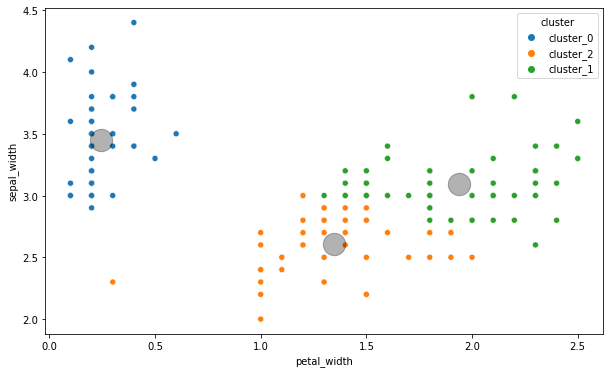

In [7]:
# use the functions I created above to plot the data

create_scatter_plot('petal_width', 'sepal_width',iris,kmeans, X_scaled, scaler)

Text(0.5, 1.0, 'Actual Species')

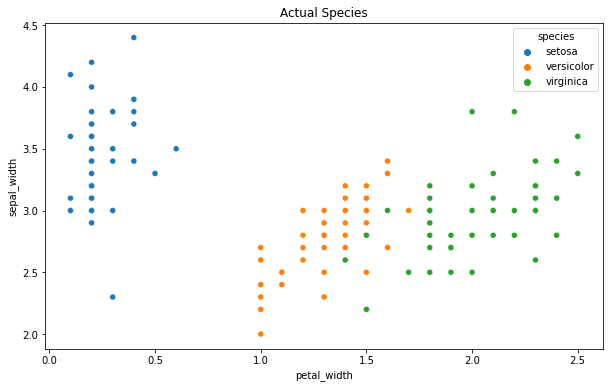

In [8]:
# actual species

plt.figure(figsize = (10,6))
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = iris, hue = 'species')
plt.title('Actual Species')

#### d. Repeat the clustering, this time with 3 different features.

In [9]:
# let's use petal_length, sepal_length and petal_width for clustering

X = iris[['petal_length', 'sepal_length', 'petal_width']]

# Use the functions we had created earlier to create clusters and visualize 

iris, X_scaled, scaler, kmeans, centroids = create_cluster(iris, X, 3)

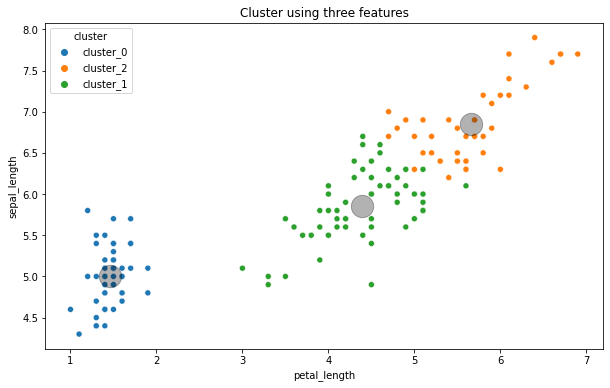

In [10]:
# create scatter plot 

create_scatter_plot('petal_length','sepal_length',iris,kmeans, X_scaled, scaler)
plt.title('Cluster using three features');

Text(0.5, 1.0, 'Actual Species')

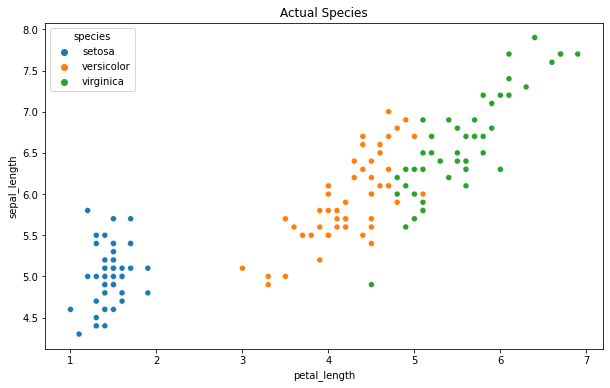

In [11]:
# lets look at scatter plot for actual species

plt.figure(figsize = (10,6))
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = iris, hue = 'species')
plt.title('Actual Species')

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [12]:
#wrangle mall data

df = wrangle.wrangle_mall_df()

In [13]:
# look at the head

df.head()

,age,annual_income,spending_score,is_male
customer_id,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


In [14]:
# let's explore based on annual_income and spending score

X = df[['annual_income', 'spending_score']]

In [15]:
X.head(3)

,annual_income,spending_score
customer_id,,
1,15,39
2,15,81
3,16,6


In [16]:
# Lets create a scaled dataframe

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,annual_income,spending_score
1,-1.779171,-0.435989
2,-1.779171,1.199413
3,-1.739447,-1.720949
4,-1.739447,1.043661
5,-1.699723,-0.397051


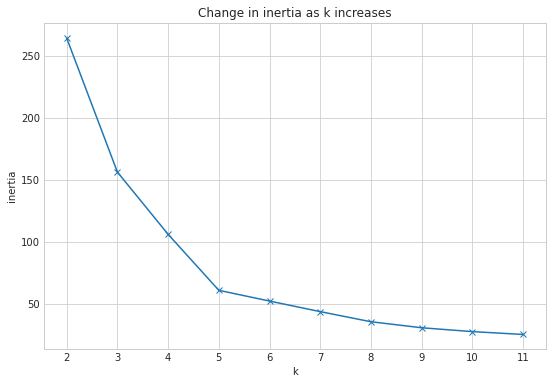

In [17]:
# let is explore what values of k might be appropriate

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

**The elbow chart above seems to suggest that '5' might be a good value for k**

In [18]:
# use the function to create clusters

df, X_scaled, scaler, kmeans, centroids = create_cluster(df, X, 5)

<Figure size 1008x648 with 0 Axes>

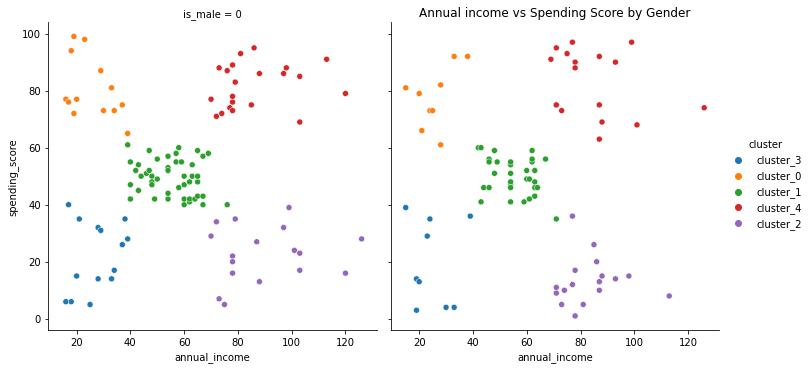

In [19]:
# scatter plot of data with hue for cluster

plt.figure(figsize=(14, 9))
sns.relplot(x = 'annual_income', y = 'spending_score', data = df, hue = 'cluster', col = 'is_male')
plt.title('Annual income vs Spending Score by Gender');

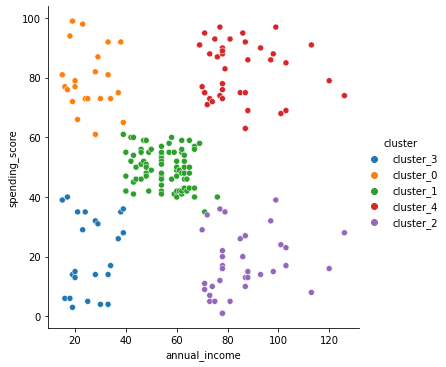

In [20]:
# clusters visualized (all genders)

sns.relplot(x = 'annual_income', y = 'spending_score', data = df, hue = 'cluster')

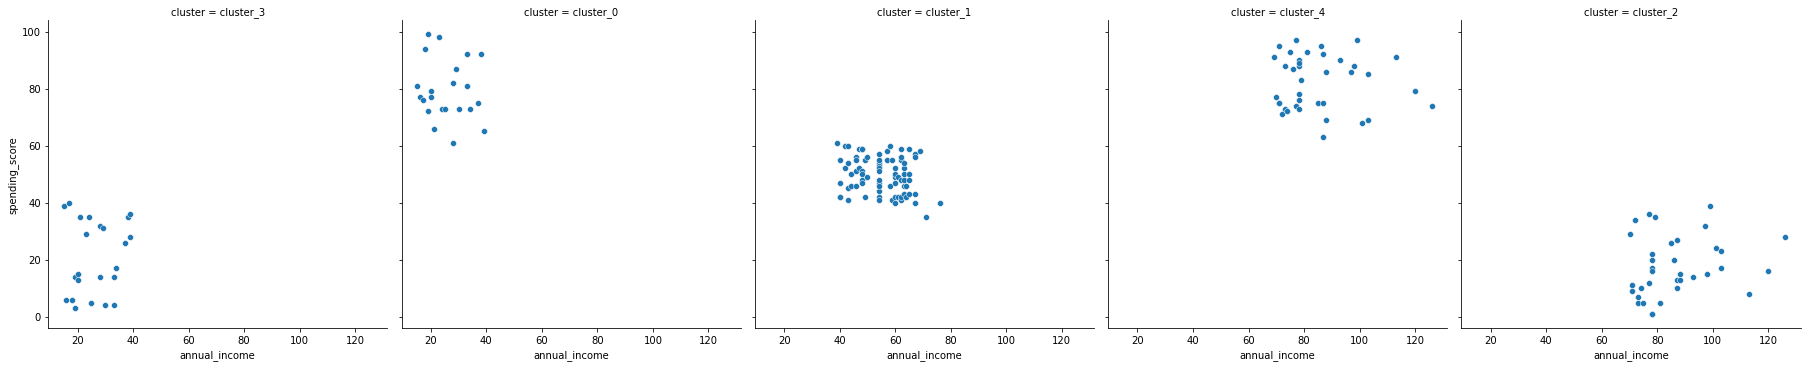

In [21]:
# plot annual incomes vs spending score for different clusters

sns.relplot(x = 'annual_income', y = 'spending_score', data = df, col = 'cluster')

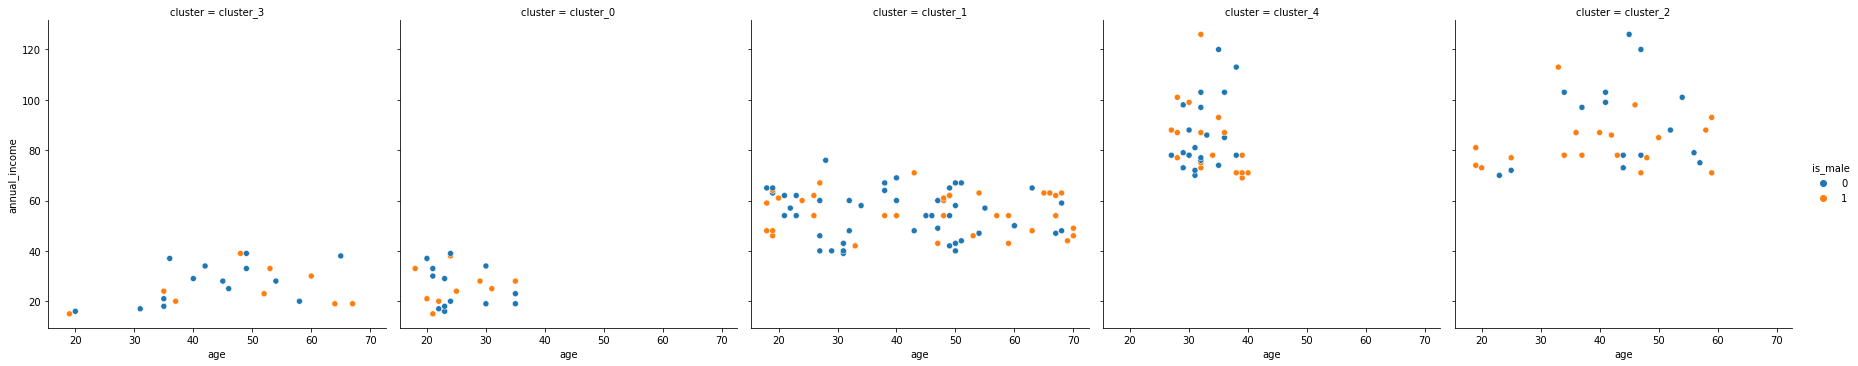

In [22]:
# lets visualize clusters by age and annual income 

sns.relplot(x = 'age', y = 'annual_income', data = df, col = 'cluster', hue = 'is_male')


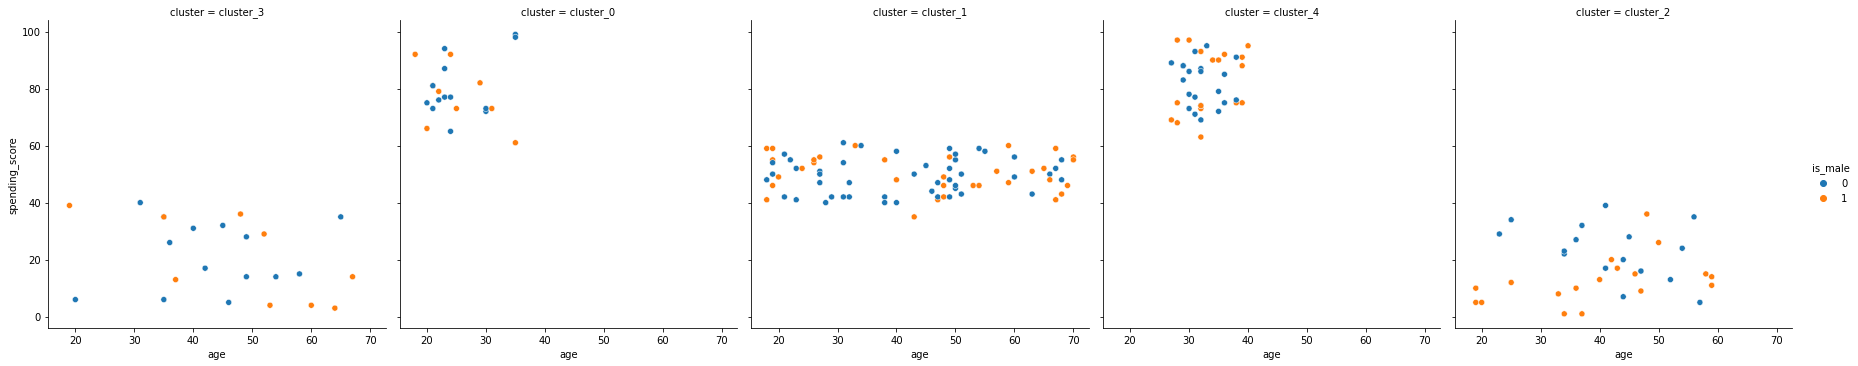

In [23]:
# lets visualize clusters by age and spending score

sns.relplot(x = 'age', y = 'spending_score', data = df, col = 'cluster', hue = 'is_male')

### Customer profiles based on visuals above:

#### Cluster 0: (Young, low income/ high spenders)
- 20-35s age range
- lower income range
- high spending score

#### Cluster 1: (average income/ average spenders)
- All age ranges
- average income range
- average spending score

#### Cluster 2: (high income/low spenders)
- All age ranges
- upper half of income range
- lower spending score


#### Cluster 3: (low income/low spenders)
- All age ranges
- lower half of income range
- lower spending


#### Cluster 4: (Millennials with high income, high spending score)
- Age: 30s and 40s('millennials')
- Upper half of income range
- Higher spending score


### How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

#### Bonus:

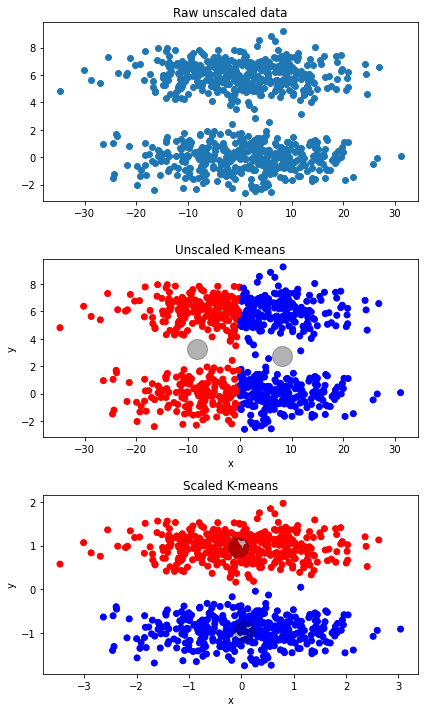

In [24]:
import random

# create data
rnorm = np.random.randn
x1 = rnorm(800) * 10  
y1 = np.concatenate([rnorm(400), rnorm(400) + 6])
df = pd.DataFrame()
df['x'] = x1
df['y'] = y1

# scale the data
scaler = StandardScaler()
cols = ['x', 'y']
df_scaled = df.copy()
df_scaled[cols] = scaler.fit_transform(df[cols])

X = df[cols]
X_scaled = df_scaled[cols]


# create subplots
fig, axes = plt.subplots(3, 1, figsize=(6,10))

#plot on first axes
axes[0].scatter(x1, y1)
axes[0].set_title('Raw unscaled data')


# Implement Kmeans on unscaled data and plot on 2nd axes
km = KMeans(2, random_state = 123)

clusters = km.fit_predict(X)
centroids = pd.DataFrame(km.cluster_centers_, columns = ['x', 'y'])

axes[1].scatter(df.x, df.y, c=clusters, cmap='bwr')
centroids.plot.scatter(x='x', y= 'y', ax=axes[1], marker='o', alpha = 0.3, s=400, c='k')
axes[1].set_title('Unscaled K-means')


# Implement Kmeans on scaled data and plot on 3rd axes

clusters = km.fit_predict(X_scaled)
centroids = pd.DataFrame(km.cluster_centers_, columns = ['x', 'y'])

axes[2].scatter(df_scaled.x, df_scaled.y, c=clusters, cmap='bwr')
centroids.plot.scatter(x= 'x', y= 'y', ax=axes[2], marker='o', alpha = 0.3, s=400, c='k')
axes[2].set_title('Scaled K-means')


plt.tight_layout()